# 데이터사이언스융합학과 2024710658 박창준

#### 계정 마운트

In [ ]:
# 계정을 구글 드라이브에 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 필요한 패키지 / 라이브러리 불러오기
import numpy as np
import cv2
import random
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
# 이미지 파일 경로
image_path = '/content/drive/MyDrive/cat4.jpg'

# 이미지 불러오기
image_pil = Image.open(image_path)
image = np.array(image_pil)

#### 원본 이미지 (222 X 159)

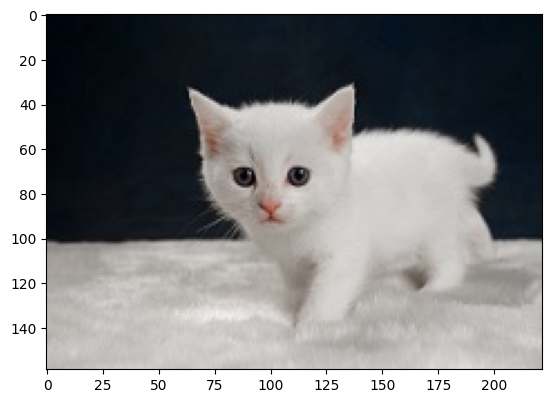

In [ ]:
# 이미지 확인 (222 X 159)
plt.imshow(image)

### [문제 1. Image Transformations (20 pts)]

#### 1-1. Translation, Rotation, Affine/Perspective Transformation 행렬을 구해보세요. 이 때, 각 행렬의 파라미터는 자유롭게 설정하세요. 그리고, 구성한 행렬을 OpenCV Library의 cv2.warpAffine과 같은 함수를 이용하여 임의의 이미지에 적용해 변형해보세요.

#### 1) Translation

In [ ]:
def translate(image, x, y):
    # Translation 행렬 생성
    # X, Y에 이동할 거리(픽셀)을 입력
    translation_matrix = np.float32([[1, 0, x], [0, 1, y]])

    # 이미지에 변형 적용
    transformed_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))

    return transformed_image

-	코드설명 :
1.	cv2.warpAffine(src, 변환행렬, dsize) 함수를 활용해 이미지를 이동하려고 합니다.
2.	src는 사용할 이미지를, dsize는 사용할 이미지의 크기를 그대로 가져옵니다. 단, 변환행렬은 X축, Y축으로 얼마나 이동할지에 대한 정보를 담아 정의해야 합니다.
3.	translation_matrix 객체를 통해 np.float32 형식의 2X3 행렬로 변환행렬을 정의했습니다. 이것은 cv2.warpAffine() 함수의 요구사항입니다.
4.	np.float32([[a, b, x], [c, d, y]])에서 a와 d는 각각 X 및 Y 축에 대한 크기 변환의 비율을 나타내며, b와 c는 각 축 방향의 크기, 회전 등의 변환을 나타냅니다. X와 y는 이동변환을 나타냅니다. 이동 변환은 이미지를 X 축 방향으로 x만큼, Y 축 방향으로 y만큼 이동시킵니다.
5.	np.float32([[1, 0, x], [0, 1, y]])로 코딩하여, 크기 변환과 회전은 없도록 정의하였습니다. 또, translate 함수에서 x와 y를 매개변수로 받아와서 원하는 수치만큼 x축, y축으로 이미지를 이동시키도록 정의했습니다.
6.	transformed_image 객체에는 cv2.warpAffine(src, 변환행렬, dsize) 함수를 통해 변환된 이미지가 저장됩니다.
7.	translate 함수의 결과로 transformed_image를 반환했습니다.

- 변경 적용 이미지 (x축 20 픽셀 이동, y축 20 픽셀 이동)

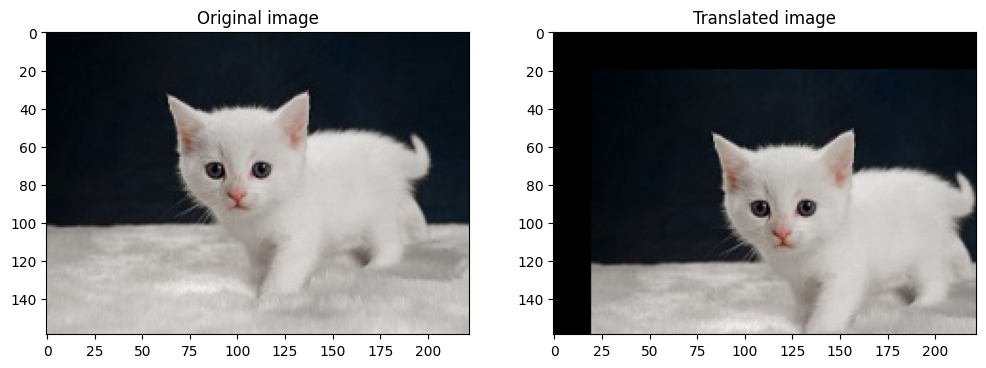

In [ ]:
plt.figure(figsize=(12, 6))

# 원본 이미지 출력
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original image')

# 변경 적용 이미지
plt.subplot(1, 2, 2)
plt.imshow(translate(image, 20, 20))
plt.title('Translated image')

plt.show()

- 결과 : 이미지가 x축 방향으로 20 픽셀, y축 방향으로 20 픽셀 이동했습니다. (x축, y축의 눈금을 통해 확인 가능합니다.)

#### 2) Rotation

In [ ]:
def rotate(image, angle):
    # 이미지의 중심 좌표 계산
    center = (image.shape[1] // 2, image.shape[0] // 2)

    # 회전 변환 행렬 생성
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)

    # 이미지에 변형 적용
    transformed_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

    return transformed_image

- 코드설명 :
1.	cv2.getRotationMatrix2D(center, angle, scale) 함수를 활용해 이미지를 회전시키고자 합니다.
2.	center 매개변수는 중심 좌표를, angle 매개변수는 회전 각도를 나타내며, scale 매개변수는 회전 후의 이미지 크기를 조절하는 데 사용됩니다.
3.	angle 매개변수는 rotate 함수를 통해 전달받을 것 입니다. 크기 조절은 수행하지 않기 때문에, scale을 1로 설정하여 원본 크기로 유지하도록 했습니다.
4.	center 객체를 통해 이미지의 중심 좌표를 계산했습니다. 이미지의 shape를 활용해 넓이//2, 높이//2를 받아오도록 정의했습니다.
5.	transformed_image 객체에는 cv2.warpAffine(src, 변환행렬, dsize)를 통해 변환된 이미지가 저장됩니다.
6.	rotate 함수의 결과로 transformed_image를 반환했습니다.

- 30도 회전시킨 이미지

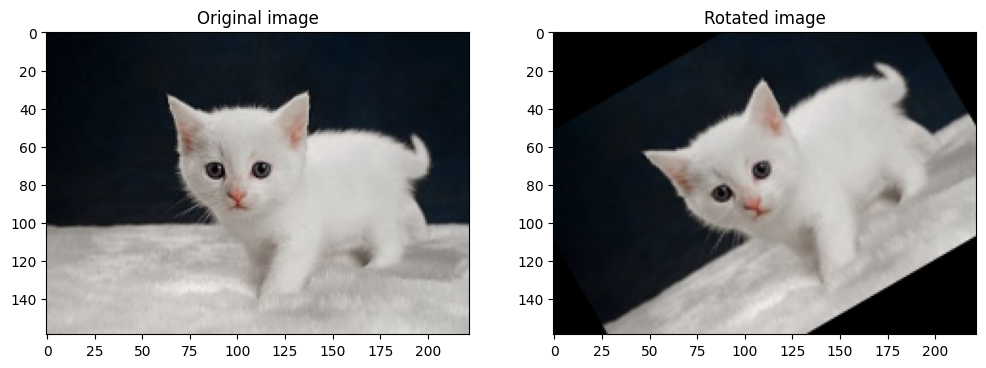

In [ ]:
plt.figure(figsize=(12, 6))

# 원본 이미지 출력
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original image')

# 변경 적용 이미지
plt.subplot(1, 2, 2)
plt.imshow(rotate(image, 30))
plt.title('Rotated image')

plt.show()

- 결과 : 이미지가 30도 회전함

#### 3) Affine Transformation

In [ ]:
def AffineTransformation(image, points1, points2):
    # 아핀 변환 행렬 생성
    transform_matrix = cv2.getAffineTransform(np.float32(points1), np.float32(points2))

    # 이미지에 아핀 변환 적용
    transformed_image = cv2.warpAffine(image, transform_matrix, (image.shape[1], image.shape[0]))

    return transformed_image

- 코드설명 :
1.	cv2.getAffineTransform(points1, points2) 함수를 활용해 Afiine 변환을 수행하고자 합니다.
2.	points1과 points2는 각각 원본 이미지와 변환된 이미지에서 대응하는 세 점의 좌표를 나타냅니다. 각 점은 (x, y) 좌표로 구성되어야 합니다.
3.	transform_matrix 객체를 통해 cv2.getAffineTransform(points1, points2) 함수를 사용하여 아핀 변환 행렬을 정의했습니다. 이때, points1과 points2는 np.float32 형식으로 변환하여 사용됩니다. 이것은 cv2.getAffineTransform() 함수의 요구사항입니다.
4.	transform_matrix객체는 원본 이미지의 세 점을 변환 이미지의 세 점으로 매핑합니다. 해당 매핑을 통해 아핀변환이 수행됩니다.
5.	transformed_image 객체에는 cv2.warpAffine(src, 변환행렬, dsize) 함수를 통해 변환된 이미지가 저장됩니다.
6.	AffineTransformation 함수의 결과로 transformed_image를 반환했습니다.

- Affine 변환 적용 이미지

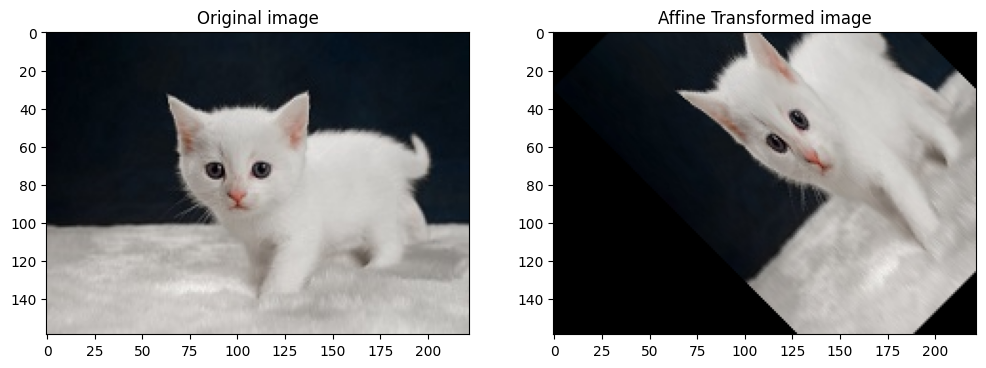

In [ ]:
plt.figure(figsize=(12, 6))

# 원본 이미지 출력
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original image')

# 변경 적용 이미지
# 3개의 match point를 사용해야 함
plt.subplot(1, 2, 2)
plt.imshow(AffineTransformation(image, ([20,10], [40, 10], [20, 20]), ([20,30], [30, 20], [30, 40])))
plt.title('Affine Transformed image')

plt.show()

- 결과 : Affine 변환 적용됨 (회전, 이동, 크기가 모두 변경됨)

#### 4) Perspective Transformation

In [ ]:
def PerspectiveTransformation(image, points1, points2):
    # Perspective 변환 행렬 생성
    transform_matrix = cv2.getPerspectiveTransform(np.float32(points1), np.float32(points2))

    # 변환된 이미지 적용
    transformed_image = cv2.warpPerspective(image, transform_matrix, (image.shape[1], image.shape[0]))

    return transformed_image

- 코드설명:
1.	cv2.getPerspectiveTransform(points1, points2) 함수를 활용해 원근 변환을 수행하고자 합니다.
2.	transform_matrix 객체를 통해 cv2.getPerspectiveTransform(points1, points2) 함수를 사용하여 원근 변환 행렬을 정의했습니다. 이 함수는 두 개의 점 집합(points1, points2)을 사용하여 원근 변환 행렬을 생성합니다. 이때, points1과 points2는 np.float32 형식으로 변환하여 사용됩니다. 이것은 cv2.getPerspectiveTransform() 함수의 요구 사항입니다.
3.	transform_matrix객체는 원본 이미지의 네 점을 변환 이미지의 네 점으로 매핑합니다. 해당 매핑을 통해 perspective Transform이 수행됩니다.
4.	transformed_image 객체에는 cv2.warpPerspective(src, 변환행렬, dsize) 함수를 통해 변환된 이미지가 저장됩니다.
5.	PerspectiveTransformation 함수의 결과로 transformed_image를 반환했습니다.

- Perspective 변환 이미지

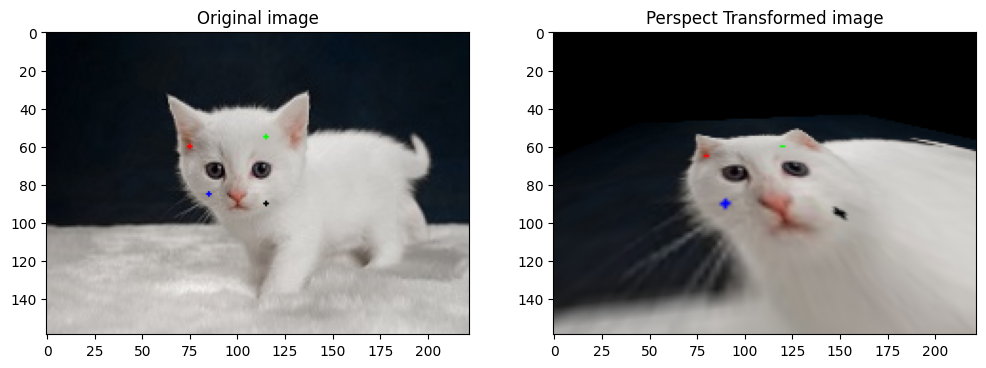

In [ ]:
plt.figure(figsize=(12, 6))

# 원본 이미지 출력
plt.subplot(1, 2, 1)

# 원본 이미지
img = image.copy()

# 붉은색 원
cv2.circle(img, (75, 60), 1,(255, 0, 0), -1)
# 초록색 원
cv2.circle(img, (115, 55), 1,(0, 255, 0), -1)
# 파란색 원
cv2.circle(img, (85, 85), 1,(0, 0, 255), -1)
# 검정색 원
cv2.circle(img, (115, 90), 1,(0, 0, 0), -1)

plt.imshow(img)
plt.title('Original image')

# 변경 적용 이미지
plt.subplot(1, 2, 2)

plt.imshow(PerspectiveTransformation(img,([75, 60], [115, 55], [85, 85], [115, 90]),  ([80, 65], [120, 60], [90, 90], [150, 95])))
plt.title('Perspect Transformed image')

plt.show()

- 결과 : 원근이 변환된 이미지가 출력됨

### [문제 2. Filters (30 pts)]

#### 2-1. OpenCV Library를 이용하여 Gaussian Filter를 임의의 이미지에 적용해보세요. 이 때, 필터의 크기/분산은 자유롭게 정해보세요.

- Gaussian Filter

In [ ]:
def Gaussian_blur(image, sigma_x, sigma_y):
    # 가우시안 필터 적용
    result = cv2.GaussianBlur(image, (0, 0), sigma_x, sigma_y)

    return result

- 코드설명:
1.	cv2.GaussianBlur(image, (0, 0), sigma_x, sigma_y) 함수를 활용해 가우시안 필터를 적용하고자 합니다.
2.	image는 필터를 적용할 이미지를 의미하며, (0,0)은 가우시안 커널의 너비와 높이, sigma_x와 sigma_y는 X와 Y의 표준편차를 의미합니다.
3.	가우시안 커널의 너비와 높이를 (0, 0)으로 정의하여, 커널의 크기를 sigma_x와 sigma_y 값에 따라 자동으로 계산하도록 정의했습니다.
4.	sigma_x와 sigma_y는 함수 GaussianBlur에서 매개변수로 받아오도록 정의했습니다.
5.	result 객체에 cv2.GaussianBlur(image, (0, 0), sigma_x, sigma_y)함수를 통해 반환된 이미지가 저장됩니다.
6.	Gaussian_blur함수의 결과로 result를 반환했습니다.

- Gaussian Filter 적용 이미지

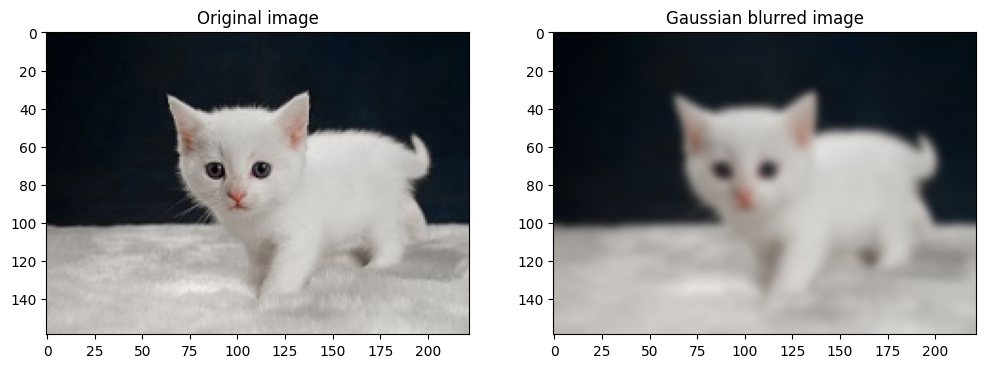

In [ ]:
plt.figure(figsize=(12, 6))

# 원본 이미지 출력
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original image')

# 필터 적용 이미지
plt.subplot(1, 2, 2)
plt.imshow(Gaussian_blur(image, 2, 2))
plt.title('Gaussian blurred image')

plt.show()

- 결과 : 가우시안 필터가 적용되면서 이미지가 흐려짐

#### 2-2. OpenCV Library를 이용하여 Sobel Filter와 Laplacian Filter를 임의의 이미지에 적용해보세요. 이 때, 필터의 파라미터는 자유롭게 정해보세요.

- Sobel Filter

In [ ]:
def Sobel(image, dx, dy, ksize=3):
    # 소벨 필터 적용
    result = cv2.Sobel(image, -1,dx, dy, ksize=ksize)
    return result

-	코드 설명:
1.	cv2.Sobel(image, -1, dx, dy, ksize) 함수를 활용해 소벨 필터를 적용하고자 합니다.
2.	image는 필터를 적용할 이미지를 의미합니다. 이미지 데이터 타입을 -1로 설정하여, 입력 이미지와 동일하도록 설정했습니다.
3. dx와 dy는 각각 x축과 y축 방향의 미분 차수를 나타냅니다.
4. ksize는 커널 크기를 지정하는 매개변수 입니다. 커널의 크기는 Sobel함수에서 매개변수로 전달받도록 정의했으며, 기본값은 3으로 정의했습니다.
5.	result 객체에 cv2.Sobel(image, -1, dx, dy, ksize) 함수를 통해 반환된 이미지가 저장됩니다.
6.	Sobel 함수의 결과로 result를 반환했습니다.

- Sobel Filter 적용 이미지

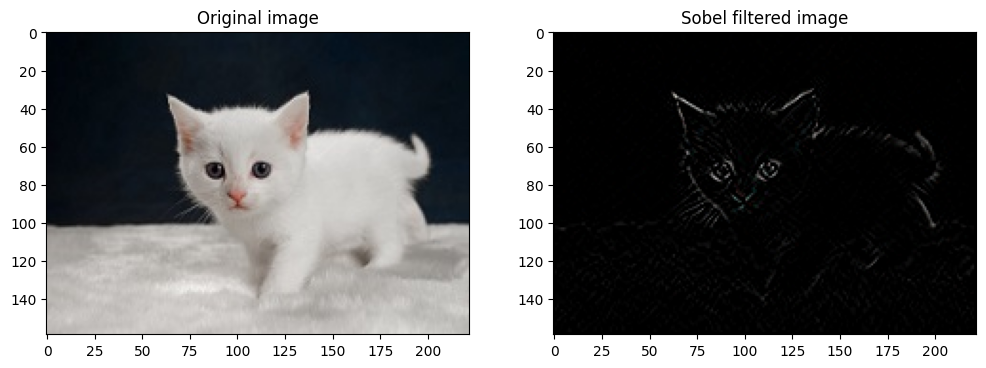

In [ ]:
plt.figure(figsize=(12, 6))

# 원본 이미지 출력
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original image')

# 필터 적용 이미지
plt.subplot(1, 2, 2)
plt.imshow(Sobel(image, 1, 1))
plt.title('Sobel filtered image')

plt.show()

- 결과 : 소벨 필터가 적용되어 다양한 경계값이 검출됨을 확인했습니다.

- Laplacian Filter

In [ ]:
def Laplacian(image, ksize=3):
    # 라플라시안 필터 적용
    result = cv2.Laplacian(image, -1, ksize=ksize)

    return result

-	코드 설명:
1.	cv2.Laplacian(image, -1, ksize) 함수를 활용해 라플라시안 필터를 적용하고자 합니다.
2.	image는 필터를 적용할 이미지를 나타내며, 이미지 데이터 타입을 -1로 설정하여 입력 이미지와 동일하도록 설정했습니다.
3. ksize는 커널 크기를 지정하는 매개변수 입니다. 커널의 크기는 함수 Laplacian에서 매개변수로 전달받도록 정의했으며, 기본값은 3으로 정의했습니다.
4.	result 객체에 cv2.Laplacian(image, -1, ksize) 함수를 통해 반환된 이미지가 저장됩니다.
5.	Laplacian 함수의 결과로 result를 반환했습니다.

- Laplacian Filter 적용 이미지

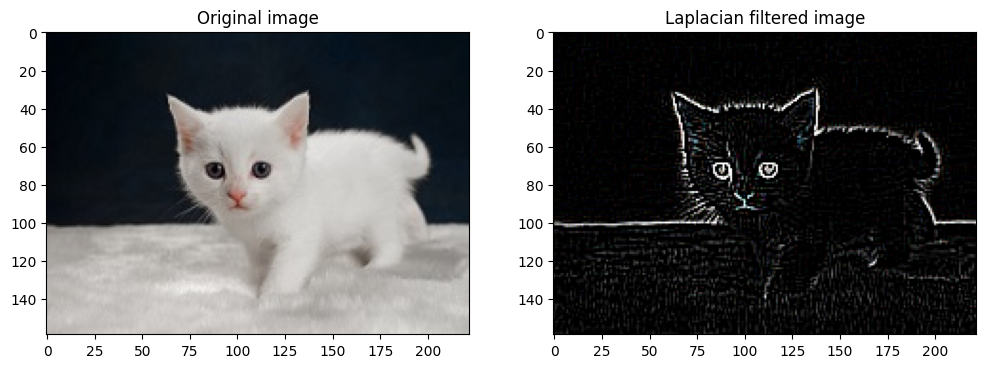

In [ ]:
plt.figure(figsize=(12, 6))

# 원본 이미지 출력
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original image')

# 필터 적용 이미지
plt.subplot(1, 2, 2)
plt.imshow(Laplacian(image))
plt.title('Laplacian filtered image')

plt.show()

- 결과 : 라플라시안 필터가 적용되어, 소벨필터와는 또 다른 형태로 경계값이 검출됨을 확인했습니다. 소벨 필터보다 뚜렷한 경계값이 검출되었습니다.

#### 2-3. 임의의 이미지에 Salt and Pepper Noise를 추가하고, 앞서 구현한 Gaussian Filter, Sobel Filter,Laplacian Filter를 각각 적용해보고, Noise의 증가/감소 관점에서 분석해보세요.

- Salt and Pepper Noise

In [ ]:
def add_salt_pepper_noise(image, prob):
    # You can use prob argument as the probability of noise at each pixel
    result = np.zeros(image.shape, np.uint8)
    th = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rand = random.random()
            if rand < prob:
                result[i][j] = 0
            elif rand > th:
                result[i][j] = 255
            else:
                result[i][j] = image[i][j]
    return result

-	코드 설명:
1.	add_salt_pepper_noise(image, prob) 함수를 정의하여, 이미지에 Salt and Pepper Noise를 추가하고자 합니다.
2.	image는 잡음을 추가할 이미지를 나타내며, prob은 각 픽셀에서 잡음이 발생할 확률을 나타냅니다.
3.	result 객체는 입력 이미지와 동일한 모양의 0으로 구성된 array를 생성합니다. 이후, 잡음이 추가된 이미지가 여기에 저장됩니다.
4.	th 객체는 임계값(잡음이 발생하지 않을 확률)로, 1 - prob로 정의했습니다.
5.	for문을 활용해 이중 반복문을 사용하여, 이미지의 각 픽셀을 반복하면서 잡음을 추가합니다.
6.	rand 객체에 random.random() 함수를 사용해 0과 1 사이의 난수를 저장하고, 이를 prob와 비교하여 잡음을 추가합니다.
7.	rand가 prob보다 작은 경우 검정색(0)으로, rand가 th보다 큰 경우 하얀색(255)로 정의합니다. 위의 경우가 아니라면 원본 이미지의 픽셀값을 그대로 사용하여 잡음을 추가하지 않습니다.
8.	result 객체에 잡음이 추가된 이미지가 저장됩니다.
9.	최종적으로 result를 반환합니다.


- Salt and Pepper Noise 적용 이미지

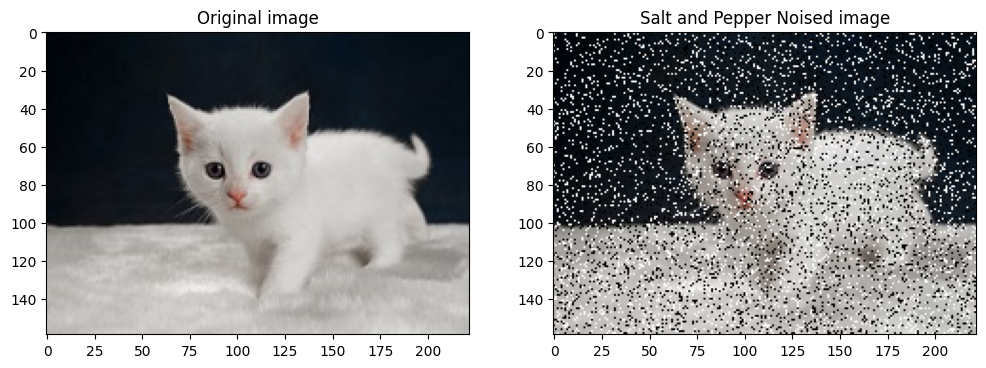

In [ ]:
plt.figure(figsize=(12, 6))

# 원본 이미지 출력
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original image')

# 노이즈 적용 이미지
plt.subplot(1, 2, 2)
plt.imshow(add_salt_pepper_noise(image, 0.1))
plt.title('Salt and Pepper Noised image')

plt.show()

- 결과 : 원본 그림에 검정, 하얀색의 Salt and Pepper 잡음이 생긴것을 확인했습니다.

 - Gaussian Filter, Sobel Filter, Laplacian Filter 적용 이미지

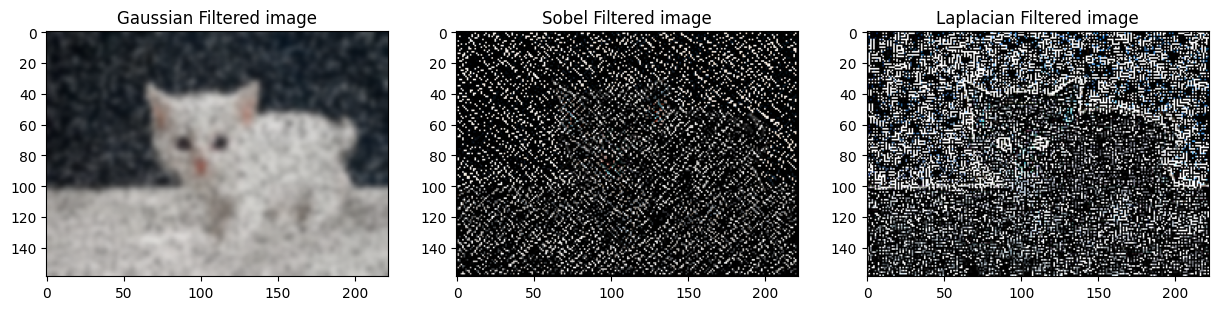

In [ ]:
plt.figure(figsize=(15, 5))

# 가우시안 필터 이미지 출력
plt.subplot(1, 3, 1)
plt.imshow(Gaussian_blur(add_salt_pepper_noise(image, 0.1), 2, 2))
plt.title('Gaussian Filtered image')

# 소벨 필터 적용 이미지
plt.subplot(1, 3, 2)
plt.imshow(Sobel(add_salt_pepper_noise(image, 0.1), 1, 1))
plt.title('Sobel Filtered image')

# 라플라시안 필터 적용 이미지
plt.subplot(1, 3, 3)
plt.imshow(Laplacian(add_salt_pepper_noise(image, 0.1)))
plt.title('Laplacian Filtered image')

plt.show()

- 결과 :
1. Gaussian Filter가 적용된 이미지의 경우, 이미지가 흐려지면서 잡음이 감소했습니다.
2. Sobel Filter 적용 이미지에는 잡음이 크게 추가되어, 원형을 알아보기 힘들게 되었습니다.
3. Laplacian Filter 적용 이미지는 원형은 알아볼 수 있지만, 굉장히 큰 잡음이 추가 되었습니다.
4. Sobel Filter, Laplacian Filter를 적용한 이미지에서 퀄리티가 크게 떨어진 것은 Noise가 큰 이미지에 경계를 검출하는 필터를 적용했기 때문에 잡음까지 경계로 검출한 것으로 판단됩니다.

#### 2-4. 앞서 Salt and Pepper Noise가 추가된 이미지에 cv2.medianBlur 함수를 이용하여 Median Filter를 적용시켜 보세요. 그리고, 2-3의 Filter들의 결과와 비교/분석해보세요.

- Median Filter

In [ ]:
def median_blur(image, kernel_size):
    # 미디안 필터 적용
    result = cv2.medianBlur(image, kernel_size)

    return result

-	코드 설명:
1.	cv2.medianBlur(image, kernel_size) 함수를 활용해 미디안 블러 필터를 적용하고자 합니다.
2.	image는 필터를 적용할 이미지를 나타내며, kernel_size는 커널 크기를 지정하는 매개변수 입니다.
3.	kernel_size는 미디안 필터의 크기를 결정합니다. 필터의 크기가 클수록 더 많은 픽셀이 고려되어, 부드러워지는 Smoothing 효과가 증가합니다.
4.	result 객체에 cv2.medianBlur(image, kernel_size) 함수를 통해 반환된 이미지가 저장됩니다.
5.	medianBlur 함수의 결과로 result를 반환했습니다.

- Median Filter 적용 이미지

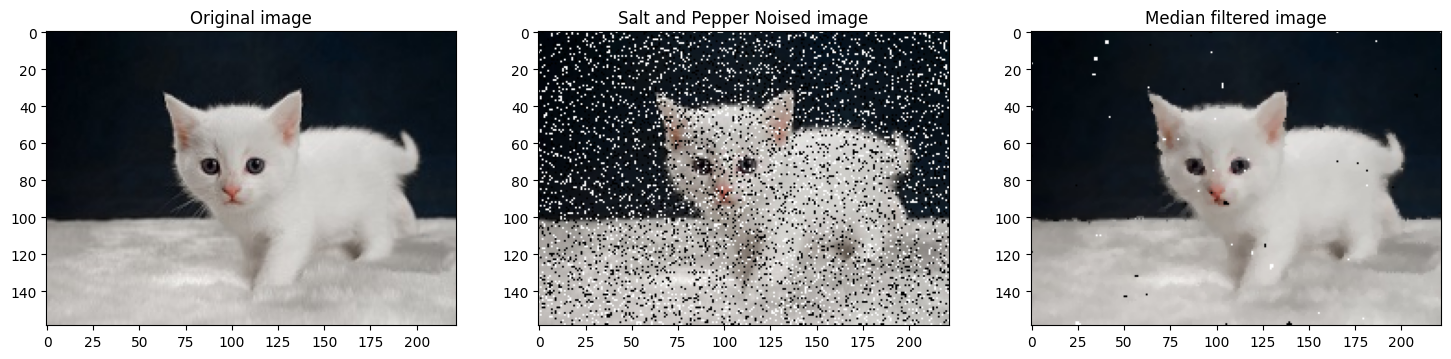

In [ ]:
plt.figure(figsize=(18, 6))

# 원본 이미지 출력
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original image')

# 변경 적용 이미지
plt.subplot(1, 3, 2)
plt.imshow(add_salt_pepper_noise(image, 0.1))
plt.title('Salt and Pepper Noised image')

# 변경 적용 이미지
plt.subplot(1, 3, 3)
plt.imshow(median_blur(add_salt_pepper_noise(image, 0.1), 3))
plt.title('Median filtered image')

plt.show()

- Median Filter, Gaussian Filter, Sobel Filter, Laplacian Filter 적용 이미지

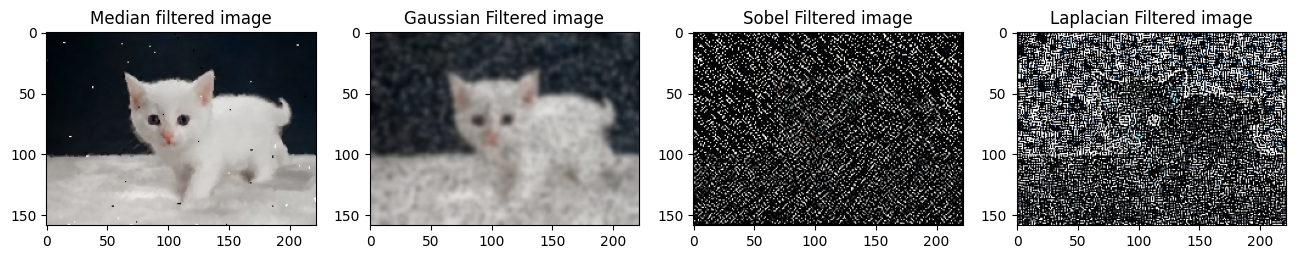

In [ ]:
plt.figure(figsize=(16, 4))

# 가우시안 필터 이미지 출력
plt.subplot(1, 4, 1)
plt.imshow(median_blur(add_salt_pepper_noise(image, 0.1), 3))
plt.title('Median filtered image')

# 가우시안 필터 이미지 출력
plt.subplot(1, 4, 2)
plt.imshow(Gaussian_blur(add_salt_pepper_noise(image, 0.1), 2, 2))
plt.title('Gaussian Filtered image')

# 소벨 필터 적용 이미지
plt.subplot(1, 4, 3)
plt.imshow(Sobel(add_salt_pepper_noise(image, 0.1), 1, 1))
plt.title('Sobel Filtered image')

# 라플라시안 필터 적용 이미지
plt.subplot(1, 4, 4)
plt.imshow(Laplacian(add_salt_pepper_noise(image, 0.1)))
plt.title('Laplacian Filtered image')

plt.show()

- 결과 :
1. Median Filter를 적용한 이미지가 앞서 2-3에서 적용했던 Gaussian Filter, Sobel Filter, Laplacian Filter 적용 이미지에서보다 잡음이 크게 감소한 것을 확인했습니다.
2. Median Filter는 개별 픽셀을 주변 픽셀의 중앙값으로 대체하기 때문에, 잡음이 크게 줄어든 것으로 판단됩니다.

### [문제 3. Image Pyramids (30 pts)]

#### 3-1. 임의의 이미지를 가지고, OpenCV Library의 cv2.resize 함수를 이용하여 Up-sampling과 Down-sampling을 적용해보세요. 이 때, Interpolation의 여러 방식(예를 들어, Bi-linear, Cubic 등)을 세가지 이상 적용시켜보고 결과에 대해 분석해보세요.

In [ ]:
# 이미지 파일 경로
image_path = '/content/drive/MyDrive/cat5.jpg'

# 이미지 불러오기(작은걸로)
image_pil = Image.open(image_path)
image = np.array(image_pil)

- 원본 이미지

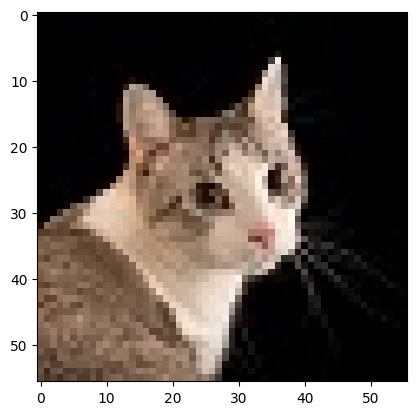

In [ ]:
# 원본이미지
plt.imshow(image)

- 다운샘플링 수행

In [ ]:
# 다운샘플링
down_result_01 = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
down_result_02 = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_NEAREST)
down_result_03 = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)

-	코드설명(다운샘플링) :
1.	cv2.resize() 함수를 사용하여 이미지를 축소했습니다.
2.	fx=0.5, fy=0.5를 설정하여 이미지의 가로 및 세로 크기를 1/2배로 축소했습니다. (원본 이미지의 1/4배)
3.	interpolation 매개변수에 cv2.INTER_LINEAR, cv2.INTER_NEAREST, cv2.INTER_CUBIC 세 가지 보간법을 적용했습니다.

- 다운샘플링 이미지 출력

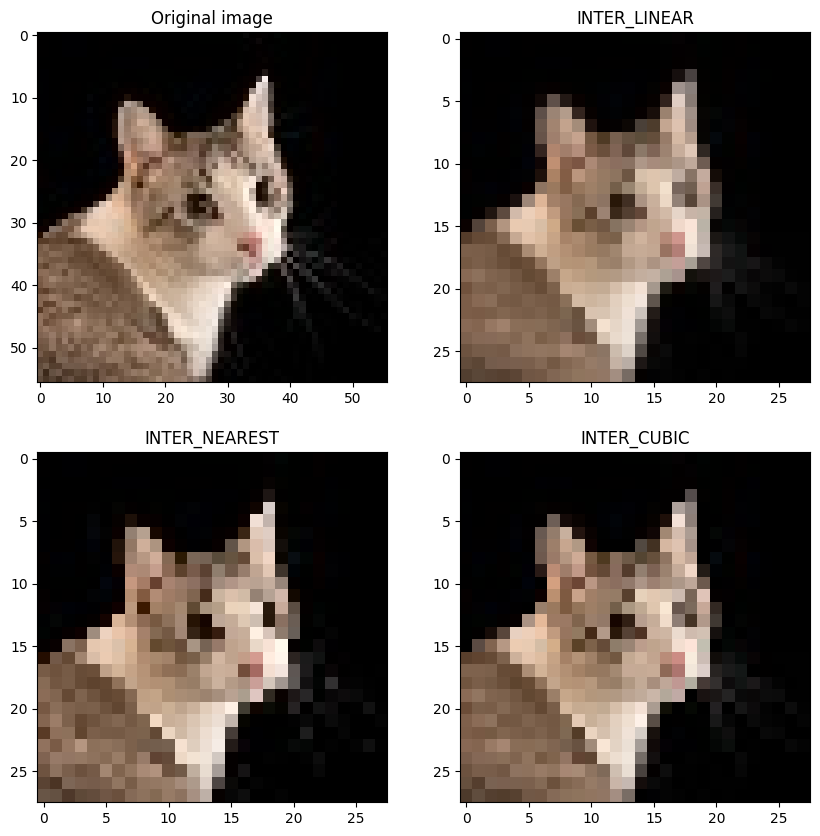

In [ ]:
plt.figure(figsize=(10, 10))

# 원본 이미지 출력
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original image')

# 변경 적용 이미지
plt.subplot(2, 2, 2)
plt.imshow(down_result_01)
plt.title('INTER_LINEAR')

# 변경 적용 이미지
plt.subplot(2, 2, 3)
plt.imshow(down_result_02)
plt.title('INTER_NEAREST')

# 변경 적용 이미지
plt.subplot(2, 2, 4)
plt.imshow(down_result_03)
plt.title('INTER_CUBIC')

plt.show()

- 결과 :
1. 모든 다운샘플링 이미지에서 원본 이미지에 비해 해상도가 감소하고 이미지 디테일이 손실된 것을 확인했습니다.
2. 보간법을 적용한 이미지도 원형을 알아보기 힘들 정도로 이미지에 손실을 입었습니다.
3. INTER_CUBIC을 적용한 이미지가 다른 보간법을 적용한 이미지보다 아주 미세하게 더 부드러워 보입니다.

- 업샘플링 수행

In [ ]:
# 업샘플링
up_result_01 = cv2.resize(image, None, fx=4, fy=4, interpolation=cv2.INTER_LINEAR)
up_result_02 = cv2.resize(image, None, fx=4, fy=4, interpolation=cv2.INTER_NEAREST)
up_result_03 = cv2.resize(image, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)

-	코드설명(업샘플링):
1.	cv2.resize() 함수를 사용하여 이미지를 확대했습니다.
2.	fx=4, fy=4를 설정하여 이미지의 가로 및 세로 크기를 4배로 확대했습니다.
    (원본 이미지의 16배)
3.	interpolation 매개변수에 cv2.INTER_LINEAR, cv2.INTER_NEAREST, cv2.INTER_CUBIC 세 가지 보간법을 적용했습니다.


- 업샘플링 이미지 출력

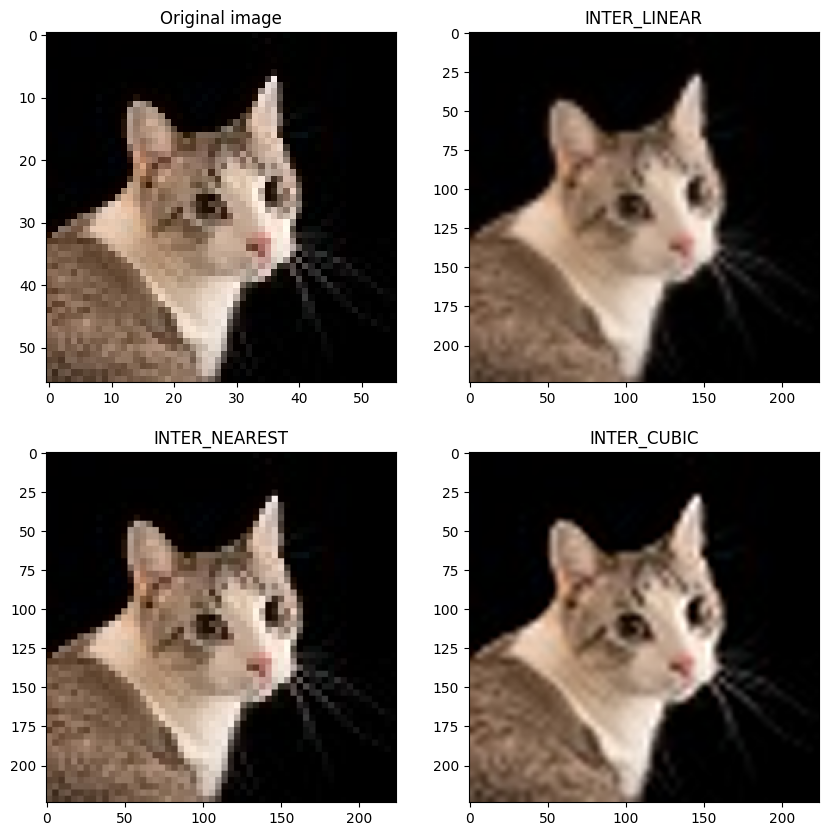

In [ ]:
plt.figure(figsize=(10,10))

# 원본 이미지 출력
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original image')

# 변경 적용 이미지
plt.subplot(2, 2, 2)
plt.imshow(up_result_01)
plt.title('INTER_LINEAR')

# 변경 적용 이미지
plt.subplot(2, 2, 3)
plt.imshow(up_result_02)
plt.title('INTER_NEAREST')

# 변경 적용 이미지
plt.subplot(2, 2, 4)
plt.imshow(up_result_03)
plt.title('INTER_CUBIC')

plt.show()

- 결과 :
1. 확대한 원본 이미지 보다 보간법을 사용한 이미지에서 더욱 선명한 디테일을 확인할 수 있었습니다.
2. INTER_NEAREST은 3가지 보간법 중 성능이 가장 좋지 않아보입니다.
3. INTER_LINEAR과 INTER_CUBIC이 거의 비슷한 퀄리티의 이미지를 보여줍니다.
4. INTER_CUBIC을 적용한 이미지가 아주 미세하게 더 부드러운 이미지를 보여줍니다.

#### 3-2. 임의의 이미지를 가지고 OpenCV Library의 pyrUp과 pyrDown 함수를 이용하여 Gaussian Pyramid 를 구성해보세요. 그리고 각 이미지들의 퀄리티와 크기를 분석하고, 용량을 Byte 단위로 비교해보세요.

In [ ]:
# 이미지 파일 경로
image_path = '/content/drive/MyDrive/cat4.jpg'

# 이미지 불러오기
image_pil = Image.open(image_path)
image_pyramid = np.array(image_pil)

- 원본 이미지 (222 X 159)

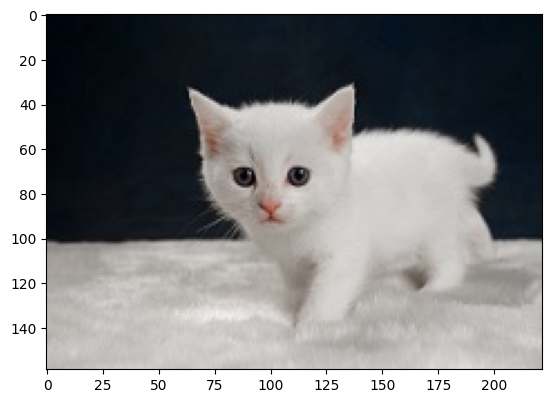

In [ ]:
plt.imshow(image_pyramid)

- 원본이미지의 크기

In [ ]:
image_pyramid.shape

(159, 222, 3)

- 가우시안 피라미드 생성

In [ ]:
# 이미지 초기화
image = image_pyramid.copy()

# 가우시안 피라미드 생성
gaussian_pyramid = [image]

# 이미지를 키워가며 가우시안 피라미드 구성
for i in range(3):
    image = cv2.pyrUp(image)
    gaussian_pyramid.insert(0, image)  # 리스트의 맨 앞에 추가

In [ ]:
# 이미지 초기화
image = image_pyramid.copy()

# 이미지를 줄여가며 가우시안 피라미드 구성
for i in range(3):
    image = cv2.pyrDown(image)
    gaussian_pyramid.append(image)  # 리스트의 맨 뒤에 추가

- 코드설명 :
1. 반복문을 통해 cv2.pyrUp 함수를 이용해 3개의 확대 이미지를 생성했습니다.
2. 반복문을 통해 cv2.pyrDown 함수를 이용해 3개의 축소 이미지를 생성했습니다.
3. 3개의 확대 이미지, 이미지 원본, 3개의 축소 이미지를 리스트에 저장했습니다.
4. 이미지 크기 순으로 저장된 list에서 이미지를 크기 순으로 하나씩 출력했습니다.

- Gaussian pyramid 출력 (업샘플링, 다운샘플링 이미지 모두 사용)

<Figure size 1000x600 with 0 Axes>

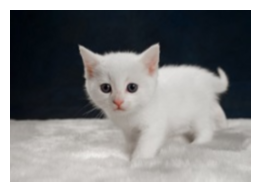

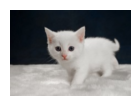

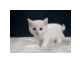

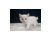

In [ ]:
# 피라미드 출력
plt.figure(figsize=(10, 6))
for i, image in enumerate(gaussian_pyramid):
    plt.figure(figsize=(image.shape[0]/50, image.shape[1]/50))
    plt.subplot(1, len(gaussian_pyramid), i+1)
    plt.imshow(image)
    plt.axis("off")

plt.show()

- 이미지의 크기 분석 (Level 7 -> Level 1 순서)
1. 이미지 확대 : Level 7 ~ 5
2. 이미지 원본 : Level 4
3. 이미지 축소 : Level 3 ~ 1

In [ ]:
# gaussian_pyramid에 저장된 이미지의 크기 확인
for i, image in enumerate(gaussian_pyramid):
    print(f"Level {len(gaussian_pyramid)-i} 이미지의 크기:", image.shape)

Level 7 이미지의 크기: (1272, 1776, 3)
Level 6 이미지의 크기: (636, 888, 3)
Level 5 이미지의 크기: (318, 444, 3)
Level 4 이미지의 크기: (159, 222, 3)
Level 3 이미지의 크기: (80, 111, 3)
Level 2 이미지의 크기: (40, 56, 3)
Level 1 이미지의 크기: (20, 28, 3)


- byte 분석 (Level 7 -> Level 1 순서)

In [ ]:
# Calculate sizes in bytes
sizes_bytes = [img.nbytes for img in gaussian_pyramid]
sizes_bytes

[6777216, 1694304, 423576, 105894, 26640, 6720, 1680]

- 결과 :
1. 피라미드의 맨 위 이미지의 해상도와 퀄리티가 가장 좋습니다. 이미지가 아래에 위치할수록 해상도와 퀄리티가 떨어집니다.
2. 이미지의 크기는 원본을 기준으로 확대시 가로 2배, 세로 2배로 4배씩 확대됩니다. 축소시에는 가로 1/2, 세로 1/2로 4배씩 축소되는 것을 확인했습니다.
3. 용량도 원본을 기준으로 확대시 4배 증가, 축소시 4배 감소 하는것을 확인했습니다.

#### 3-3. 임의의 이미지를 가지고 Laplacian Pyramid를 구성해보세요. 그리고, 각 이미지들의 퀄리티와 크기를 분석하고, 용량을 Byte 단위로 비교해보세요.

- Laplacian Pyramid 생성

In [ ]:
# 이미지 초기화
image = image_pyramid.copy()

# 가우시안 피라미드 생성
gaussian_pyramid = [image]

# 이미지를 줄여가며 가우시안 피라미드 구성
for i in range(3):
    image = cv2.pyrDown(image)
    gaussian_pyramid.append(image)

In [ ]:
# Laplacian Pyramid 생성
laplacian_pyramid = [gaussian_pyramid[-1]]
for i in range(3, 0, -1):
    gaussian_expanded = cv2.pyrUp(gaussian_pyramid[i])
    h, w, _ = gaussian_pyramid[i - 1].shape
    laplacian = cv2.subtract(gaussian_pyramid[i - 1], cv2.resize(gaussian_expanded, (w, h)))
    laplacian_pyramid.insert(0, laplacian)

- 코드설명 :
1. laplacian_pyramid 리스트에 가우시안 피라미드의 가장 작은 이미지를 추가합니다.
2. 가우시안 피라미드의 현재레벨 이미지를 cv2.pyrUp()을 이용해 확대한 후 저장합니다.
3. 해당 이미지를 가우시안 피라미드의 이전 레벨 이미지에서 빼줍니다.
4. 해당 연산의 결과를 리스트 laplacian_pyramid의 맨 앞에 추가합니다.
5. 상기의 연산을 반복하여 laplacian_pyramid를 완성합니다.

- Laplacian Pyramid 출력

<Figure size 1000x600 with 0 Axes>

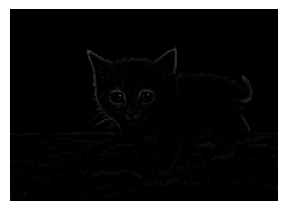

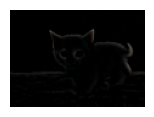

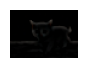

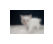

In [ ]:
# Laplacian 피라미드 출력
plt.figure(figsize=(10, 6))
for i, image in enumerate(laplacian_pyramid):
    plt.figure(figsize=(image.shape[0]/10, image.shape[1]/10))
    plt.subplot(1, len(laplacian_pyramid), i+1)
    plt.imshow(image)
    plt.axis("off")

plt.show()

- 이미지 크기 분석 (Level 4 -> Level 1 순서)

In [ ]:
# gaussian_pyramid에 저장된 이미지의 크기 확인
for i, image in enumerate(laplacian_pyramid):
    print(f"Level {len(laplacian_pyramid)-i} 이미지의 크기:", image.shape)

Level 4 이미지의 크기: (159, 222, 3)
Level 3 이미지의 크기: (80, 111, 3)
Level 2 이미지의 크기: (40, 56, 3)
Level 1 이미지의 크기: (20, 28, 3)


- bytes 분석 (Level 4 -> Level 1 순서)

In [ ]:
# Calculate sizes in bytes
sizes_bytes = [img.nbytes for img in laplacian_pyramid]
sizes_bytes

[105894, 26640, 6720, 1680]

- 결과 :
1. 크기가 가장 작은 이미지는 가우시안 피라미드에서 크기가 가장 작은 이미지와 동일합니다.
2. laplacian_pyramid에는 가우시안 피라미드 이미지와의 차이값이 반복 저장됩니다.
3. 이미지의 크기는 레벨이 다운될 때마다 가로 1/2, 세로 1/2로 4배씩 축소되는 것을 확인했습니다.
4. 용량도 레벨이 다운될 때마다 4배씩 감소 하는것을 확인했습니다.

#### 3-4. 임의의 이미지를 가지고 3-1, 3-2, 3-3에서 구현한 방법을 사용해서 2회 이상 Down하고 다시 Up하여 얻어진 복원된 이미지의 결과를 원본 이미지와 비교해보세요.

#### 1) cv2.resize() 이용

In [ ]:
# 단순 down & up
image = image_pyramid.copy()

down_resize_01 = cv2.resize(image_pyramid, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)
down_resize_02 = cv2.resize(down_resize_01, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)

up_resize_01 = cv2.resize(down_resize_02, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
up_resize_02 = cv2.resize(up_resize_01, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

- 코드 설명:
1. 3-1번에서 수행했던 cv2.resize 함수를 이용해 이미지에 축소, 확대를 2회씩 적용했습니다.


- 원본 이미지 VS 복원 이미지

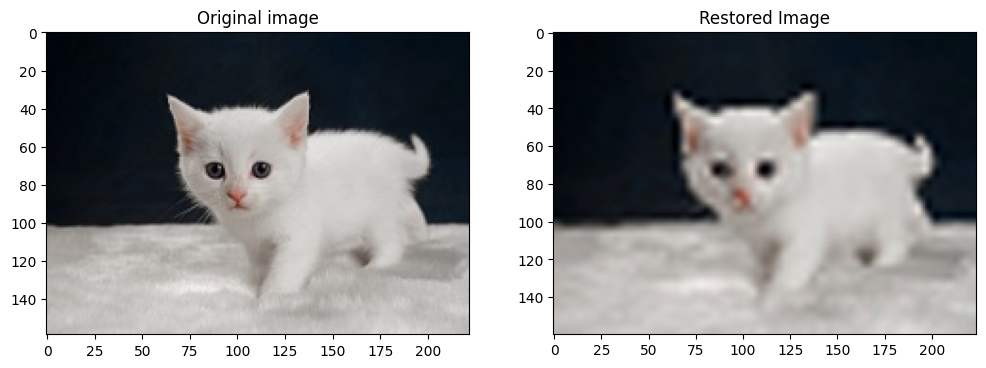

In [ ]:
plt.figure(figsize=(12, 6))

# 원본 이미지 출력
plt.subplot(1, 2, 1)
plt.imshow(image_pyramid)
plt.title('Original image')

# 변경 적용 이미지
plt.subplot(1, 2, 2)
plt.imshow(up_resize_02)
plt.title('Restored Image')

plt.show()

- 결과 : 원본 이미지보다 퀄리티가 매우 좋지 않습니다. 이미지를 축소하고 다시 확대하는 과정에서 정보의 손실이 매우 컸기 때문입니다.

#### 2) Gaussian Pyramid 이용

In [ ]:
down_gaussian_01 = cv2.pyrDown(image_pyramid)
down_gaussian_02 = cv2.pyrDown(down_gaussian_01)

up_gaussian_01 = cv2.pyrUp(down_gaussian_02)
up_gaussian_02 = cv2.pyrUp(up_gaussian_01)

- 코드 설명:
1. 3-2번에서 수행했던 cv2.pyrUp 함수를 이용해 이미지에 축소, 확대를 2회씩 적용했습니다.



- 원본 이미지 VS 복원 이미지

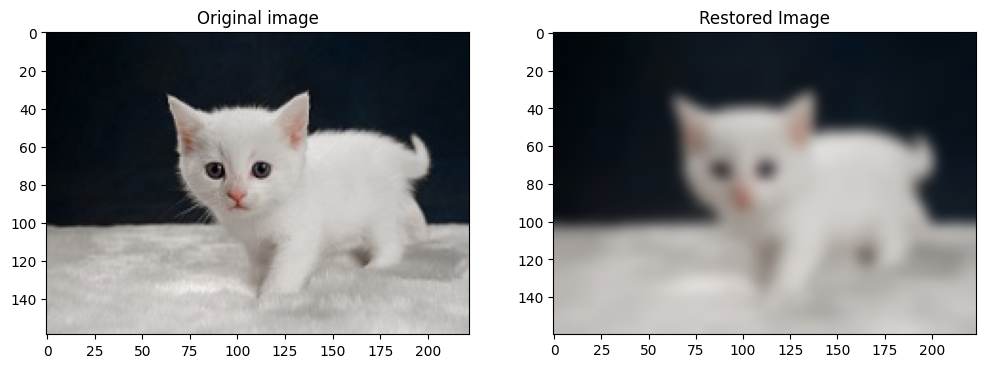

In [ ]:
plt.figure(figsize=(12, 6))

# 원본 이미지 출력
plt.subplot(1, 2, 1)
plt.imshow(image_pyramid)
plt.title('Original image')

# 변경 적용 이미지
plt.subplot(1, 2, 2)
plt.imshow(up_gaussian_02)
plt.title('Restored Image')

plt.show()

- 결과 : 여전히 원본 이미지보다 퀄리티가 매우 좋지 않습니다. 블러의 효과가 매우 강하게 나타납니다. 이미지를 축소하고 다시 확대하는 과정에서, 정보가 손실된 채로 가우시안 필터가 적용되었기 때문인 것으로 판단됩니다.

#### 3) Laplacian Pyramid 이용

In [ ]:
# Gaussian down
down_gaussian_01 = cv2.pyrDown(image_pyramid)
down_gaussian_02 = cv2.pyrDown(down_gaussian_01)

# laplacian 1
up_gaussian_01 = cv2.pyrUp(down_gaussian_02)
h, w, _ = up_gaussian_01.shape
Laplacian_01 = cv2.add(up_gaussian_01, cv2.resize(laplacian_pyramid[1], (w,h)))

# laplacian 2
up_gaussian_02 = cv2.pyrUp(Laplacian_01)
h, w, _ = up_gaussian_02.shape
Laplacian_02 = cv2.add(up_gaussian_02, cv2.resize(laplacian_pyramid[0], (w,h)))

- 코드 설명:
1. cv2.pyrDown함수를 2번 적용해 이미지를 축소했습니다.
2. cv2.pyrUp 함수로 이미지를 다시 확대한 후, 3-3번에서 생성했던 laplacian_pyramid의 이미지를 더해서 이미지를 복원했습니다.
3. 위 2번의 과정을 2번 수행했습니다.

- 원본 이미지 VS 복원 이미지

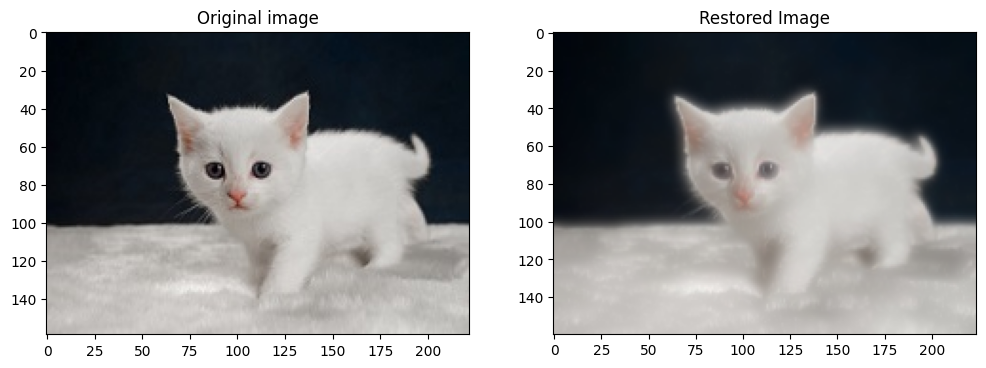

In [ ]:
plt.figure(figsize=(12, 6))

# 원본 이미지 출력
plt.subplot(1, 2, 1)
plt.imshow(image_pyramid)
plt.title('Original image')

# 변경 적용 이미지
plt.subplot(1, 2, 2)
plt.imshow(Laplacian_02)
plt.title('Restored Image')

plt.show()

- 결과 :
1. 보정된 이미지는 원본 이미지 보다 화사한 느낌의 이미지로 보정되었습니다. 또한, 앞선 이미지 복원 결과와 비교했을 때 이미지의 퀄리티와 디테일이 월등하게 좋아진 것을 확인할 수 있었습니다.

### [문제 4. Median Blur 직접 구현 (20 pts)]

#### 4-1. 앞서 적용해보았던 Median Blur를 Numpy 라이브러리를 활용하여 직접 구현해보세요. 이 때, np.sort와 같은 모든 라이브러리 사용이 가능합니다. 단, cv2.medianBlur()는 사용하지 않고 구현한 후, 결과를 검증하기 위하여 cv2.medianBlur() 결과와 직접 구현한 결과를 분석해보세요.

- my_median_blur 구현

In [ ]:
def my_median_blur(image, kernel_size):
    # 이미지의 높이와 너비 저장
    height, width = image.shape[:2]
    # 미디언 블러링된 이미지를 저장할 리스트 생성
    blurred_image = np.zeros_like(image, dtype=np.uint8)

    # 커널의 중심을 기준으로 탐색해야 할 픽셀 수
    k = kernel_size // 2

    # 이미지의 각 픽셀을 순회
    for y in range(height):
        for x in range(width):
            # 커널 내의 픽셀 값 저장을 위한 리스트
            kernel_pixels = []

            # 커널 내 픽셀별 연산을 위한 반복
            for ky in range(-k, k+1):
                for kx in range(-k, k+1):
                    # 이미지 경계를 벗어나지 않는 경우만 픽셀 수집
                    if 0 <= y + ky < height and 0 <= x + kx < width:
                        kernel_pixels.append(image[y + ky, x + kx])

            # 커널 내 픽셀 값을 정렬
            sorted_pixels = np.sort(kernel_pixels, axis=0)

            # 중앙값을 blurred_image에 저장
            blurred_image[y, x] = sorted_pixels[len(sorted_pixels) // 2]

    return blurred_image

- 코드설명 :
1. image와 kernel_size를 매개변수로 전달 받습니다. image는 Median Blur를 적용할 이미지이며, kernel_size는 Median Blur를 적용할 커널의 크기입니다.
2. k = kernel_size // 2를 사용하여 커널 크기의 중앙값을 구했습니다. 이것은 커널이 움직이는 범위를 설정하는데 사용됩니다.
3. 이중 반복문을 사용해 이미지의 각 픽셀을 순회합니다.
4. 이중 반복문 안에 또 한번의 이중 반복문을 사용해, 커널이 이미지 안에서 순회하며 연산을 수행하도록 구현했습니다. 커널은 이미지 안의 픽셀만 수집해서 리스트에 저장합니다.
5. 커널의 연산이 끝나면, 수집한 리스트를 크기 순으로 정렬하여 중앙값을 추출합니다. 해당 중앙값을 커널의 중심에 위치한 픽셀에 할당하여 Median Blur를 적용합니다.
6. 위의 3번 ~ 5번이 반복 수행되어 이미지에 대한 Median Blur를 적용합니다.
7. 최종적으로 Median Blur가 적용된 이미지를 반환합니다.

- 이미지 출력

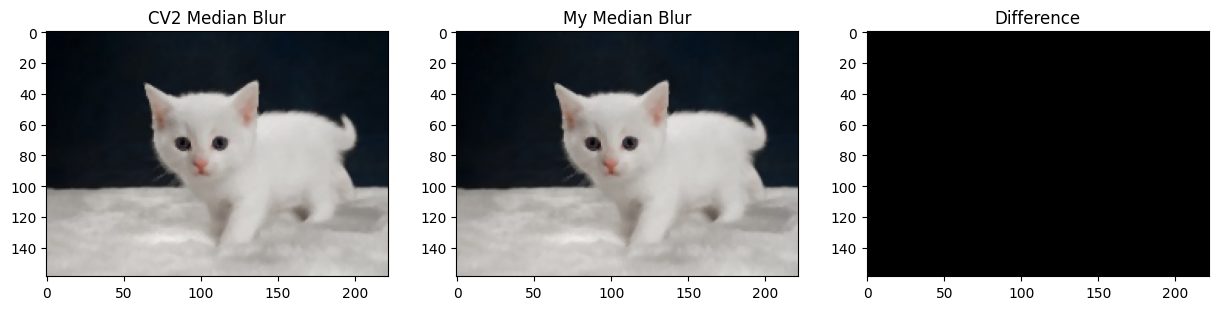

In [ ]:
result1 = cv2.medianBlur(image_pyramid, 3)
result2 = my_median_blur(image_pyramid, 3)
diff = cv2.subtract(result1, result2)

plt.figure(figsize=(15, 5))

# 원본 이미지 출력
plt.subplot(1, 3, 1)
plt.imshow(result1)
plt.title('CV2 Median Blur')

# 함수 적용 이미지
plt.subplot(1, 3, 2)
plt.imshow(result2)
plt.title('My Median Blur')

# 원본과의 차이
plt.subplot(1, 3, 3)
plt.imshow(diff)
plt.title('Difference')

plt.show()

- 결과 :
1. 눈으로 봤을때 Cv2 Median Blur와 My Median Blur의 차이를 느끼지 못할 정도로 높은 퀄리티로 my_median_blur가 잘 구현되었습니다.
2. 두 이미지의 차이를 나타내는 diff에서도 모두 검은색으로 표시되었습니다.